In [71]:
# importing all the necesssaary libraries first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz


# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
#importing the data set 
report = pd.read_csv("worldhappinessreport.csv")

In [9]:
report

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
report.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
report.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [12]:
# information about the data set 
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

F:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

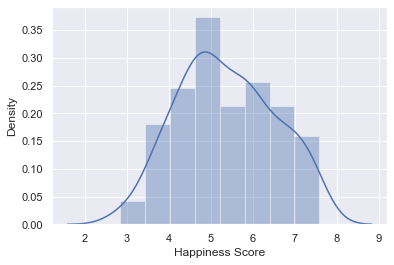

In [73]:
sns.distplot(report['Happiness Score'])


In [15]:
#nowimporting and cleaning the data set 
report.sort_values(by = ["Country"], inplace = True, ascending = True)
report = report.reset_index(drop=True)
report = pd.DataFrame(report[:156])
report = pd.concat([report],axis=1)
report.columns = data.columns.str.upper()

In [20]:
# Extracting the required variables from the dataframe
extracts = ["Country","Region","Happiness Rank", "Happiness Score","Standard Error", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", \
            "Freedom", "Trust (Government Corruption)", \
            "Generosity", "Dystopia Residual"]

report= pd.DataFrame(data[extracts])


In [21]:
report

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [22]:
# removing duplicate data if any in the data set
report = report.loc[:,~data.columns.duplicated()]
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [24]:
# now need to remove the rows with the missing values 
report= report.dropna(how='any',axis=0)
report

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
# Resetting the index
report = report.reset_index(drop=True)
report


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [27]:
#statistics summary of all the variables 
report.describe().round(2)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00
mean,79.49,5.38,0.05,0.85,0.99,0.63,0.43,0.14,0.24,2.10
std,45.75,1.15,0.02,0.40,0.27,0.25,0.15,0.12,0.13,0.55
min,1.00,2.84,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.33
25%,40.25,4.53,0.04,0.55,0.86,0.44,0.33,0.06,0.15,1.76
50%,79.50,5.23,0.04,0.91,1.03,0.70,0.44,0.11,0.22,2.10
75%,118.75,6.24,0.05,1.16,1.21,0.81,0.55,0.18,0.31,2.46
max,158.00,7.59,0.14,1.69,1.40,1.03,0.67,0.55,0.80,3.60


In [28]:
#Calculation of the corellation matrix
report.corr().round(2)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.00,-0.99,0.16,-0.79,-0.73,-0.74,-0.56,-0.37,-0.16,-0.52
Happiness Score,-0.99,1.00,-0.18,0.78,0.74,0.72,0.57,0.40,0.18,0.53
Standard Error,0.16,-0.18,1.00,-0.22,-0.12,-0.31,-0.13,-0.18,-0.09,0.08
Economy (GDP per Capita),-0.79,0.78,-0.22,1.00,0.65,0.82,0.37,0.31,-0.01,0.04
Family,-0.73,0.74,-0.12,0.65,1.00,0.53,0.44,0.21,0.09,0.15
Health (Life Expectancy),-0.74,0.72,-0.31,0.82,0.53,1.00,0.36,0.25,0.11,0.02
Freedom,-0.56,0.57,-0.13,0.37,0.44,0.36,1.00,0.49,0.37,0.06
Trust (Government Corruption),-0.37,0.40,-0.18,0.31,0.21,0.25,0.49,1.00,0.28,-0.03
Generosity,-0.16,0.18,-0.09,-0.01,0.09,0.11,0.37,0.28,1.00,-0.10
Dystopia Residual,-0.52,0.53,0.08,0.04,0.15,0.02,0.06,-0.03,-0.10,1.00


<AxesSubplot:>

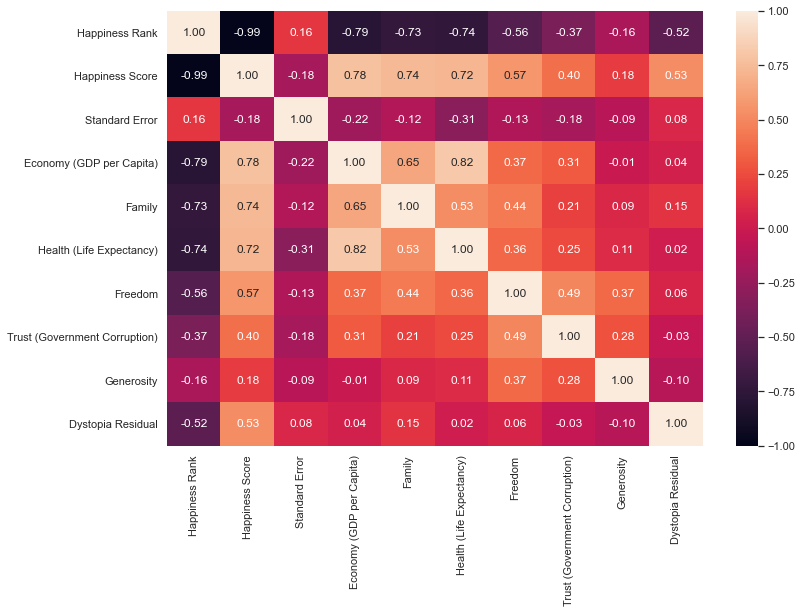

In [29]:
# Heatmap of Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [30]:
# Dataframe of the Happiness Score
happiness_score = pd.DataFrame(data["Happiness Score"])
happiness_score.describe().round(2)

,Happiness Score
count,158.00
mean,5.38
std,1.15
min,2.84
25%,4.53
50%,5.23
75%,6.24
max,7.59


F:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

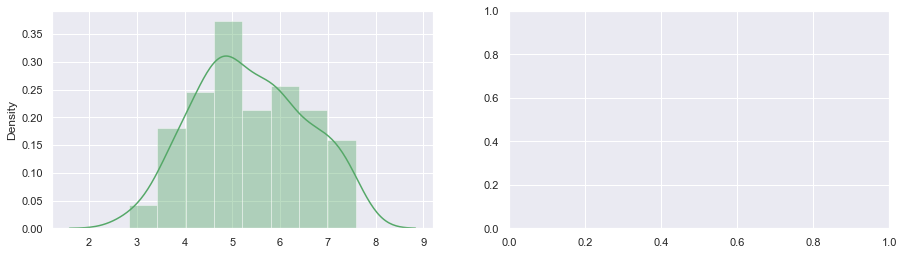

In [37]:
#plotting the dist plot of the happiness score 
f,axes = plt.subplots(1,2,figsize=(15,4))

sb.distplot(happiness_score,kde=True,hist=True,color="g",ax=axes[0])


In [38]:
# Remove any duplicate columns (if any)
report = report.loc[:,~report.columns.duplicated()]
report.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [45]:
# now we need to predict the happiness so Add our Happiness Category into the Happiness_Score dataframe
happiness=[]
for i in happiness_score["Happiness Score"]:
    if i<4:
        happiness.append("Unhappy")
    elif 4<=i<=6:
        happiness.append("Normal")
    else:
        happiness.append("Happy")

# Join our Hapiness_Score dataframe into the main dataframe
pred_happiness = pd.DataFrame(happiness,columns=["Predicted_Happiness"])
pred_happiness = pd.DataFrame(pred_happiness["Predicted_Happiness"].astype('category'))
report = pd.concat([data,pred_happiness],axis=1)
report

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Predicted_Happiness
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Happy
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Happy
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Happy
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Happy
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Unhappy
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Unhappy
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Unhappy
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Unhappy


In [46]:
# Remove any duplicate columns
report = report.loc[:,~report.columns.duplicated()]
report.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Predicted_Happiness
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Happy
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Happy
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Happy
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Happy
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Happy


In [48]:
report["Predicted_Happiness"].value_counts()

Normal     93
Happy      44
Unhappy    21
Name: Predicted_Happiness, dtype: int64

F:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Countries')

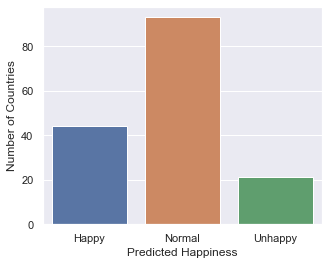

In [50]:
# visualizing the happiness category 
f, axes = plt.subplots(1, 1, figsize=(5, 4))
sb.countplot(report["Predicted_Happiness"])
plt.xlabel("Predicted Happiness")
plt.ylabel("Number of Countries")

In [62]:
predictors=["Economy (GDP per Capita)","Health (Life Expectancy)","Family","Generosity","Dystopia Residual"]
x=pd.DataFrame(report[predictors])
y=pd.DataFrame(report["Predicted_Happiness"])


In [63]:
predictors

['Economy (GDP per Capita)',
 'Health (Life Expectancy)',
 'Family',
 'Generosity',
 'Dystopia Residual']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 42)
forest = RandomForestClassifier(n_estimators = 80, random_state = 42, max_depth = 10, min_samples_split = 0.1, min_samples_leaf = 0.001)
forest.fit(x_train,y_train)


<ipython-input-65-9f78d7db0a0d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=0.001,
                       min_samples_split=0.1, n_estimators=80, random_state=42)

In [67]:
y_train_pred_forest=forest.predict(x_train)
y_test_pred_forest=forest.predict(x_test)
print("Goodness of fit by using Random Forest Classifier:")
print("\tThe prediction accuracy on Train set: ",round(forest.score(x_train,y_train),2))
print("\tThe prediction accuracy on Test set: ",round(forest.score(x_test,y_test), 2))
print()

Goodness of fit by using Random Forest Classifier:
	The prediction accuracy on Train set:  0.93
	The prediction accuracy on Test set:  0.7



In [70]:
X = data[["Economy (GDP per Capita)", "Health (Life Expectancy)", "Family", "Generosity","Dystopia Residual"]]
y = data["Happiness Score"]
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=10)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Training set R^2:", linreg.score(X_train, y_train))
print("Test set R^2:", linreg.score(X_test, y_test))

Training set R^2: 0.9720727683898726
Test set R^2: 0.9686652275011407


# The above is the training of the dataset with the linear regeression algorithm method to predict the most similar country